In [1]:
# Python
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns

In [2]:
import celloracle as co
co.__version__

'0.7.0'

In [3]:
print(sc.__version__)

1.7.2


In [4]:
# visualization settings
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.rcParams['figure.figsize'] = [6, 4.5]
plt.rcParams["savefig.dpi"] = 300

In [5]:
co.test_R_libraries_installation()

R path: /home/chsu/anaconda3/envs/celloracle/bin/R
checking R library installation: igraph -> OK
checking R library installation: linkcomm -> OK
checking R library installation: rnetcarto -> OK


In [6]:
save_folder = "figures"
os.makedirs(save_folder, exist_ok=True)

In [7]:
os.chdir('/fast/AG_Ohler/CheWei/celloracle')

In [8]:
import pathlib
pathlib.Path().resolve()

PosixPath('/fast/AG_Ohler/CheWei/celloracle')

In [9]:
id2name = pd.read_table('../proj_sc/cbpsc/features.tsv.gz', compression='gzip', header=None)

In [11]:
# Load BR time course samples in h5ad format 
sc_43 = sc.read_h5ad("../kallisto-bus/output/Integration/sc_43_SCT.h5ad")
sc_44 = sc.read_h5ad("../kallisto-bus/output/Integration/sc_44_SCT.h5ad")
sc_45 = sc.read_h5ad("../kallisto-bus/output/Integration/sc_45_SCT.h5ad")
sc_46 = sc.read_h5ad("../kallisto-bus/output/Integration/sc_46_SCT.h5ad")
sc_47 = sc.read_h5ad("../kallisto-bus/output/Integration/sc_47_SCT.h5ad")
sc_48 = sc.read_h5ad("../kallisto-bus/output/Integration/sc_48_SCT.h5ad")
sc_49 = sc.read_h5ad("../kallisto-bus/output/Integration/sc_49_SCT.h5ad")
sc_50 = sc.read_h5ad("../kallisto-bus/output/Integration/sc_50_SCT.h5ad")

In [12]:
sc_43.obs['orig.ident']= "sc_43"
sc_44.obs['orig.ident']= "sc_44"
sc_45.obs['orig.ident']= "sc_45"
sc_46.obs['orig.ident']= "sc_46"
sc_47.obs['orig.ident']= "sc_47"
sc_48.obs['orig.ident']= "sc_48"
sc_49.obs['orig.ident']= "sc_49"
sc_50.obs['orig.ident']= "sc_50"

In [13]:
sc_50.obs['time.celltype.anno.Li.crude']

AAACCCAAGAAACTAC            Proximal Lateral Root Cap
AAACCCAAGAGTCAGC                 Elongation_Pericycle
AAACCCAAGCTAGATA                Elongation_Procambium
AAACCCACAAGTTTGC                     Elongation_Xylem
AAACCCACACGAGAAC                     Distal Columella
                                  ...                
TTTGTTGAGTGATTCC               Elongation_Trichoblast
TTTGTTGCACTACCCT    Proliferation Domain_Atrichoblast
TTTGTTGGTGACTAAA                    Maturation_Phloem
TTTGTTGGTGGATACG              Elongation_Atrichoblast
TTTGTTGTCTGAGAAA            Proximal Lateral Root Cap
Name: time.celltype.anno.Li.crude, Length: 5087, dtype: object

In [14]:
adata = sc_43.concatenate(sc_44,sc_45,sc_46,sc_47,sc_48,sc_49,sc_50)

In [15]:
adata.obs['orig.ident']

AAACCCAAGCGATGGT-0    sc_43
AAACCCAAGTGGTTCT-0    sc_43
AAACCCACAAGCAATA-0    sc_43
AAACCCACACAAGGTG-0    sc_43
AAACCCACATATTCGG-0    sc_43
                      ...  
TTTGTTGAGTGATTCC-7    sc_50
TTTGTTGCACTACCCT-7    sc_50
TTTGTTGGTGACTAAA-7    sc_50
TTTGTTGGTGGATACG-7    sc_50
TTTGTTGTCTGAGAAA-7    sc_50
Name: orig.ident, Length: 52921, dtype: object

In [16]:
pd.Series(adata.obs['orig.ident']).value_counts()

sc_43    8874
sc_47    6907
sc_46    6847
sc_44    6843
sc_48    6389
sc_45    6336
sc_49    5638
sc_50    5087
Name: orig.ident, dtype: int64

In [17]:
adata.obs['BR_time']= adata.obs['orig.ident']

In [18]:
adata.obs['BR_time'] = adata.obs['BR_time'].replace('dc1', 'WT')
adata.obs['BR_time'] = adata.obs['BR_time'].replace('dc2', 'WT')
adata.obs['BR_time'] = adata.obs['BR_time'].replace('sc_1', 'WT')
adata.obs['BR_time'] = adata.obs['BR_time'].replace('sc_12', 'WT')
adata.obs['BR_time'] = adata.obs['BR_time'].replace('sc_2', 'BRZ')
adata.obs['BR_time'] = adata.obs['BR_time'].replace('sc_43', 'BRZ')
adata.obs['BR_time'] = adata.obs['BR_time'].replace('sc_50', 'BRZ')
adata.obs['BR_time'] = adata.obs['BR_time'].replace('sc_5', 'BRZ_2_BL')
adata.obs['BR_time'] = adata.obs['BR_time'].replace('sc_44', 'BRZ_0_5_BL')
adata.obs['BR_time'] = adata.obs['BR_time'].replace('sc_45', 'BRZ_1_BL')
adata.obs['BR_time'] = adata.obs['BR_time'].replace('sc_46', 'BRZ_2_BL')
adata.obs['BR_time'] = adata.obs['BR_time'].replace('sc_47', 'BRZ_4_BL')
adata.obs['BR_time'] = adata.obs['BR_time'].replace('sc_48', 'BRZ_8_BL')
adata.obs['BR_time'] = adata.obs['BR_time'].replace('sc_49', 'BRZ_2_BL')

In [19]:
pd.Series(adata.obs['BR_time']).value_counts()

BRZ           13961
BRZ_2_BL      12485
BRZ_4_BL       6907
BRZ_0_5_BL     6843
BRZ_8_BL       6389
BRZ_1_BL       6336
Name: BR_time, dtype: int64

In [20]:
pd.Series(adata.obs['time.celltype.anno.Li.crude']).value_counts()

Proximal Lateral Root Cap                7219
Elongation_Pericycle                     6412
Elongation_Procambium                    5990
Elongation_Endodermis                    2860
Elongation_Cortex                        2488
Distal Lateral Root Cap                  2410
Proliferation Domain_Atrichoblast        2249
Elongation_Atrichoblast                  2223
Elongation_Trichoblast                   2032
Elongation_Xylem                         1931
Distal Columella                         1810
Maturation_Trichoblast                   1766
Maturation_Endodermis                    1652
Elongation_Phloem                        1643
Maturation_Atrichoblast                  1601
Transition Domain_Trichoblast            1427
Transition Domain_Cortex                 1151
Transition Domain_Atrichoblast           1144
Maturation_Pericycle                      806
Proliferation Domain_Trichoblast          788
Maturation_Procambium                     741
Maturation_Cortex                 

In [21]:
import re

In [24]:
adata.obs['celltype.anno'] = adata.obs['time.celltype.anno.Li.crude']
adata.obs['celltype.anno'] = [re.sub('^Proximal ', '',x)for x in adata.obs['celltype.anno']]
adata.obs['celltype.anno'] = [re.sub('^Distal ', '',x)for x in adata.obs['celltype.anno']]
adata.obs['celltype.anno'] = [re.sub('Proliferation Domain_', '',x)for x in adata.obs['celltype.anno']]
adata.obs['celltype.anno'] = [re.sub('Transition Domain_', '',x)for x in adata.obs['celltype.anno']]
adata.obs['celltype.anno'] = [re.sub('Elongation_', '',x)for x in adata.obs['celltype.anno']]
adata.obs['celltype.anno'] = [re.sub('Maturation_', '',x)for x in adata.obs['celltype.anno']]

In [25]:
pd.Series(adata.obs['celltype.anno']).value_counts()

Lateral Root Cap    9629
Pericycle           7497
Atrichoblast        7217
Procambium          6774
Trichoblast         6013
Endodermis          4861
Cortex              4287
Xylem               2366
Columella           2160
Phloem              2092
Quiescent Center      25
Name: celltype.anno, dtype: int64

In [26]:
adata.obs['time.anno'] = adata.obs['time.celltype.anno.Li.crude']
adata.obs['time.anno'] = [re.sub('_.*$', '',x)for x in adata.obs['time.anno']]

In [27]:
pd.Series(adata.obs['time.anno']).value_counts()

Elongation                   25579
Maturation                    7406
Proximal Lateral Root Cap     7219
Transition Domain             4309
Proliferation Domain          3838
Distal Lateral Root Cap       2410
Distal Columella              1810
Proximal Columella             350
Name: time.anno, dtype: int64

In [28]:
adata.obs['celltype.time.anno'] = adata.obs['time.celltype.anno.Li.crude'].astype(str) + "_" + adata.obs['BR_time'].astype(str)

In [29]:
pd.Series(adata.obs['celltype.time.anno']).value_counts()

Proximal Lateral Root Cap_BRZ                     2132
Proximal Lateral Root Cap_BRZ_2_BL                2038
Elongation_Pericycle_BRZ                          1456
Elongation_Procambium_BRZ_2_BL                    1451
Elongation_Procambium_BRZ                         1416
                                                  ... 
Transition Domain_Endodermis_BRZ                     2
Transition Domain_Procambium_BRZ_4_BL                2
Proliferation Domain_Quiescent Center_BRZ_4_BL       1
Proliferation Domain_Pericycle_BRZ_0_5_BL            1
Transition Domain_Xylem_BRZ_8_BL                     1
Name: celltype.time.anno, Length: 209, dtype: int64

In [30]:
adata.layers["raw_count"] = adata.X.copy()

In [ ]:
## Save input for CellOracle
adata.write_h5ad("8S_BR_Zones_celloracle_input.h5ad")

In [10]:
## Downloaded from ARVEX
ADATA = sc.read_h5ad('8S_BR_Zones_celloracle_input.h5ad')

In [11]:
ADATA

AnnData object with n_obs × n_vars = 52921 × 21062
    obs: 'orig.ident', 'time.celltype.anno.Li.crude', 'time.celltype.anno.Li', 'time.celltype.anno', 'time.celltype.anno.crude', 'celltype.anno.crude', 'celltype.anno', 'time.anno', 'CytoTRACE_pseudotime', 'consensus.time.group', 'branch.anno', 'batch', 'BR_time', 'celltype.time.anno'
    var: 'sct.variable', 'sct.detection_rate-0', 'sct.gmean-0', 'sct.variance-0', 'sct.residual_mean-0', 'sct.residual_variance-0', 'sct.detection_rate-1', 'sct.gmean-1', 'sct.variance-1', 'sct.residual_mean-1', 'sct.residual_variance-1', 'sct.detection_rate-2', 'sct.gmean-2', 'sct.variance-2', 'sct.residual_mean-2', 'sct.residual_variance-2', 'sct.detection_rate-3', 'sct.gmean-3', 'sct.variance-3', 'sct.residual_mean-3', 'sct.residual_variance-3', 'sct.detection_rate-4', 'sct.gmean-4', 'sct.variance-4', 'sct.residual_mean-4', 'sct.residual_variance-4', 'sct.detection_rate-5', 'sct.gmean-5', 'sct.variance-5', 'sct.residual_mean-5', 'sct.residual_variance-

In [12]:
## Downloaded from ARVEX
wanted_TFs = pd.read_csv("./Kay_TF_thalemine_annotations.csv")

In [13]:
wanted_TFs.head()

,GeneID,Name,Description
0,AT1G01010,NAC001,NAC domain containing protein 1
1,AT1G01030,NGA3,AP2/B3-like transcriptional factor family protein
2,AT1G01060,LHY,Homeodomain-like superfamily protein
3,AT1G01250,AT1G01250,Integrase-type DNA-binding superfamily protein
4,AT1G01260,AT1G01260,basic helix-loop-helix (bHLH) DNA-binding supe...


In [14]:
## Downloaded from ARVEX
DE = pd.read_csv("../proj_sc/cbpsc/v4_BL2hr_v_BRZ_cell_time_EdgeR_q0.05_FC1.5_r_v_4_20220112.csv", index_col=0)

In [15]:
len(DE['gene'].unique())

8286

In [16]:
## Downloaded from ARVEX
import pickle

with open("./base_GRN_TG_to_TF_dictionary.pkl", 'rb') as file_handle:
    TG_to_TF_dictionary = pickle.load(file_handle)

In [17]:
DE['cluster_id'].str.split("_", n=1, expand = True)[1].unique()

array(['Trichoblast', 'Atrichoblast', 'Cortex', 'Pericycle', None,
       'Procambium', 'Phloem', 'Endodermis', 'Xylem'], dtype=object)

In [18]:
DE['cluster_id'].unique()

array(['Transition Domain_Trichoblast', 'Transition Domain_Atrichoblast',
       'Elongation_Atrichoblast', 'Transition Domain_Cortex',
       'Elongation_Trichoblast', 'Elongation_Cortex',
       'Proliferation Domain_Pericycle', 'Distal Columella',
       'Maturation_Atrichoblast', 'Maturation_Pericycle',
       'Maturation_Procambium', 'Proximal Columella', 'Elongation_Phloem',
       'Transition Domain_Pericycle', 'Maturation_Endodermis',
       'Elongation_Endodermis', 'Proliferation Domain_Atrichoblast',
       'Proliferation Domain_Cortex', 'Maturation_Trichoblast',
       'Transition Domain_Phloem', 'Maturation_Cortex',
       'Proliferation Domain_Trichoblast', 'Maturation_Phloem',
       'Proliferation Domain_Endodermis', 'Maturation_Xylem',
       'Proximal Lateral Root Cap', 'Elongation_Procambium',
       'Elongation_Xylem', 'Distal Lateral Root Cap',
       'Elongation_Pericycle'], dtype=object)

## Run CellOracle on each cell types

In [55]:
#cell_of_interest = ADATA.obs.index[np.where((ADATA.obs['celltype.anno']=='Cortex') & (ADATA.obs['orig.ident']!='sc_1') & (ADATA.obs['orig.ident']!='sc_2') & (ADATA.obs['orig.ident']!='sc_5') & (ADATA.obs['orig.ident']!='sc_12')& (ADATA.obs['orig.ident']!='dc1')& (ADATA.obs['orig.ident']!='dc2'))]
cortex = ADATA.obs.index[np.where((ADATA.obs['time.celltype.anno.Li.crude']=='Proliferation Domain_Cortex')|(ADATA.obs['time.celltype.anno.Li.crude']=='Transition Domain_Cortex')|(ADATA.obs['time.celltype.anno.Li.crude']=='Elongation_Cortex')|(ADATA.obs['time.celltype.anno.Li.crude']=='Maturation_Cortex'))]
endodermis = ADATA.obs.index[np.where((ADATA.obs['time.celltype.anno.Li.crude']=='Proliferation Domain_Endodermis')|(ADATA.obs['time.celltype.anno.Li.crude']=='Transition Domain_Endodermis')|(ADATA.obs['time.celltype.anno.Li.crude']=='Elongation_Endodermis')|(ADATA.obs['time.celltype.anno.Li.crude']=='Maturation_Endodermis'))]
trichoblast = ADATA.obs.index[np.where((ADATA.obs['time.celltype.anno.Li.crude']=='Proliferation Domain_Trichoblast')|(ADATA.obs['time.celltype.anno.Li.crude']=='Transition Domain_Trichoblast')|(ADATA.obs['time.celltype.anno.Li.crude']=='Elongation_Trichoblast')|(ADATA.obs['time.celltype.anno.Li.crude']=='Maturation_Trichoblast'))]
atrichoblast = ADATA.obs.index[np.where((ADATA.obs['time.celltype.anno.Li.crude']=='Proliferation Domain_Atrichoblast')|(ADATA.obs['time.celltype.anno.Li.crude']=='Transition Domain_Atrichoblast')|(ADATA.obs['time.celltype.anno.Li.crude']=='Elongation_Atrichoblast')|(ADATA.obs['time.celltype.anno.Li.crude']=='Maturation_Atrichoblast'))]
pericycle = ADATA.obs.index[np.where((ADATA.obs['celltype.time.anno']!='Proliferation Domain_Pericycle_BRZ_0_5_BL')&(ADATA.obs['time.celltype.anno.Li.crude']=='Proliferation Domain_Pericycle')|(ADATA.obs['time.celltype.anno.Li.crude']=='Transition Domain_Pericycle')|(ADATA.obs['time.celltype.anno.Li.crude']=='Elongation_Pericycle')|(ADATA.obs['time.celltype.anno.Li.crude']=='Maturation_Pericycle'))]
phloem = ADATA.obs.index[np.where((ADATA.obs['time.celltype.anno.Li.crude']=='Proliferation Domain_Phloem')|(ADATA.obs['time.celltype.anno.Li.crude']=='Transition Domain_Phloem')|(ADATA.obs['time.celltype.anno.Li.crude']=='Elongation_Phloem')|(ADATA.obs['time.celltype.anno.Li.crude']=='Maturation_Phloem'))]
xylem = ADATA.obs.index[np.where((ADATA.obs['celltype.time.anno']!='Transition Domain_Xylem_BRZ_8_BL')&(ADATA.obs['time.celltype.anno.Li.crude']=='Transition Domain_Xylem')|(ADATA.obs['time.celltype.anno.Li.crude']=='Proliferation Domain_Xylem')|(ADATA.obs['time.celltype.anno.Li.crude']=='Elongation_Xylem')|(ADATA.obs['time.celltype.anno.Li.crude']=='Maturation_Xylem'))]
procambium = ADATA.obs.index[np.where((ADATA.obs['time.celltype.anno.Li.crude']=='Elongation_Procambium')|(ADATA.obs['time.celltype.anno.Li.crude']=='Transition Domain_Procambium')|(ADATA.obs['time.celltype.anno.Li.crude']=='Maturation_Procambium'))]
lrc = ADATA.obs.index[np.where((ADATA.obs['time.celltype.anno.Li.crude']=='Proximal Lateral Root Cap')|(ADATA.obs['time.celltype.anno.Li.crude']=='Distal Lateral Root Cap'))]
columella = ADATA.obs.index[np.where((ADATA.obs['time.celltype.anno.Li.crude']=='Proximal Columella')|(ADATA.obs['time.celltype.anno.Li.crude']=='Distal Columella'))]


In [57]:
print(len(cortex))
print(len(endodermis))
print(len(trichoblast))
print(len(atrichoblast))
print(len(pericycle))
print(len(phloem))
print(len(xylem))
print(len(procambium))
print(len(lrc))
print(len(columella))

4287
4861
6013
7217
7496
2092
2365
6772
9629
2160


In [58]:
celltypes = {'xylem':xylem, 'procambium':procambium, 'lrc':lrc, 'columella':columella}

In [59]:
ADATA

AnnData object with n_obs × n_vars = 52921 × 21062
    obs: 'orig.ident', 'time.celltype.anno.Li.crude', 'time.celltype.anno.Li', 'time.celltype.anno', 'time.celltype.anno.crude', 'celltype.anno.crude', 'celltype.anno', 'time.anno', 'CytoTRACE_pseudotime', 'consensus.time.group', 'branch.anno', 'batch', 'BR_time', 'celltype.time.anno'
    var: 'sct.variable', 'sct.detection_rate-0', 'sct.gmean-0', 'sct.variance-0', 'sct.residual_mean-0', 'sct.residual_variance-0', 'sct.detection_rate-1', 'sct.gmean-1', 'sct.variance-1', 'sct.residual_mean-1', 'sct.residual_variance-1', 'sct.detection_rate-2', 'sct.gmean-2', 'sct.variance-2', 'sct.residual_mean-2', 'sct.residual_variance-2', 'sct.detection_rate-3', 'sct.gmean-3', 'sct.variance-3', 'sct.residual_mean-3', 'sct.residual_variance-3', 'sct.detection_rate-4', 'sct.gmean-4', 'sct.variance-4', 'sct.residual_mean-4', 'sct.residual_variance-4', 'sct.detection_rate-5', 'sct.gmean-5', 'sct.variance-5', 'sct.residual_mean-5', 'sct.residual_variance-

In [60]:
gene_of_interest = ADATA.var.index[ADATA.var.index.isin(wanted_TFs['GeneID'])|ADATA.var.index.isin(pd.Series(np.array(DE['gene'])[np.where(DE['cluster_id'].str.split("_", n=1, expand = True)[1]=='xylem'.capitalize())[0]]).unique())]
adata = ADATA[celltypes['xylem'], gene_of_interest]

In [61]:
pd.Series(adata.obs['celltype.time.anno']).value_counts()

Elongation_Xylem_BRZ                     483
Elongation_Xylem_BRZ_2_BL                476
Elongation_Xylem_BRZ_8_BL                281
Elongation_Xylem_BRZ_4_BL                273
Elongation_Xylem_BRZ_0_5_BL              227
Elongation_Xylem_BRZ_1_BL                191
Maturation_Xylem_BRZ                     120
Maturation_Xylem_BRZ_8_BL                 57
Maturation_Xylem_BRZ_0_5_BL               39
Maturation_Xylem_BRZ_1_BL                 36
Maturation_Xylem_BRZ_2_BL                 35
Proliferation Domain_Xylem_BRZ            27
Proliferation Domain_Xylem_BRZ_2_BL       26
Proliferation Domain_Xylem_BRZ_0_5_BL     24
Transition Domain_Xylem_BRZ_2_BL          19
Maturation_Xylem_BRZ_4_BL                 12
Transition Domain_Xylem_BRZ                9
Transition Domain_Xylem_BRZ_0_5_BL         9
Proliferation Domain_Xylem_BRZ_1_BL        8
Transition Domain_Xylem_BRZ_1_BL           7
Proliferation Domain_Xylem_BRZ_4_BL        4
Transition Domain_Xylem_BRZ_4_BL           2
Name: cell

xylem
Number of genes : 2808
View of AnnData object with n_obs × n_vars = 2365 × 2808
    obs: 'orig.ident', 'time.celltype.anno.Li.crude', 'time.celltype.anno.Li', 'time.celltype.anno', 'time.celltype.anno.crude', 'celltype.anno.crude', 'celltype.anno', 'time.anno', 'CytoTRACE_pseudotime', 'consensus.time.group', 'branch.anno', 'batch', 'BR_time', 'celltype.time.anno'
    var: 'sct.variable', 'sct.detection_rate-0', 'sct.gmean-0', 'sct.variance-0', 'sct.residual_mean-0', 'sct.residual_variance-0', 'sct.detection_rate-1', 'sct.gmean-1', 'sct.variance-1', 'sct.residual_mean-1', 'sct.residual_variance-1', 'sct.detection_rate-2', 'sct.gmean-2', 'sct.variance-2', 'sct.residual_mean-2', 'sct.residual_variance-2', 'sct.detection_rate-3', 'sct.gmean-3', 'sct.variance-3', 'sct.residual_mean-3', 'sct.residual_variance-3', 'sct.detection_rate-4', 'sct.gmean-4', 'sct.variance-4', 'sct.residual_mean-4', 'sct.residual_variance-4', 'sct.detection_rate-5', 'sct.gmean-5', 'sct.variance-5', 'sct.residu

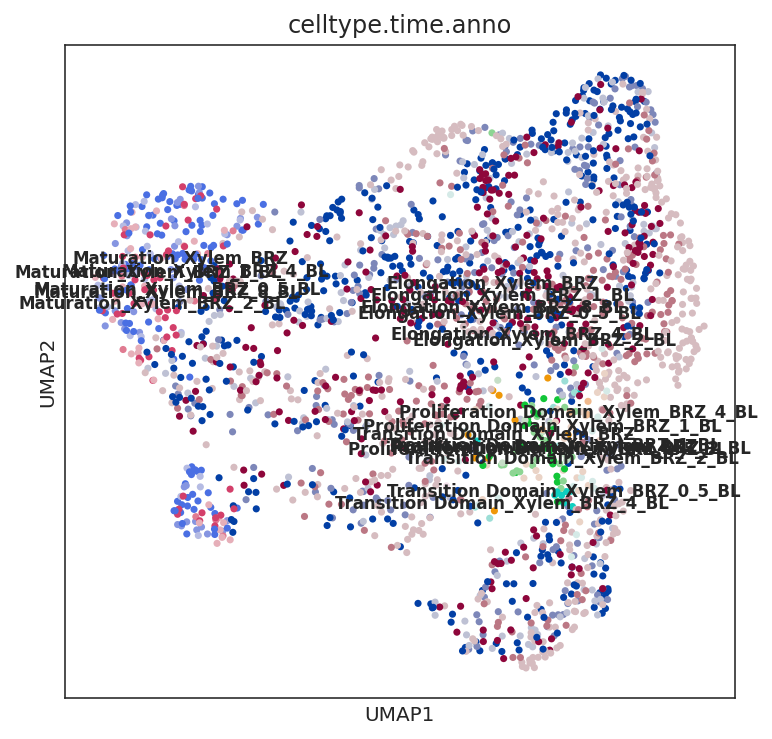

Instantiate Oracle object
Instantiate Oracle object
KNN computation
cell number is :2365
Auto-selected k is :59
GRN construction


  0%|          | 0/22 [00:00<?, ?it/s]

inferring GRN for Elongation_Xylem_BRZ...


  0%|          | 0/2805 [00:00<?, ?it/s]

inferring GRN for Elongation_Xylem_BRZ_0_5_BL...


  0%|          | 0/2805 [00:00<?, ?it/s]

inferring GRN for Elongation_Xylem_BRZ_1_BL...


  0%|          | 0/2805 [00:00<?, ?it/s]

inferring GRN for Elongation_Xylem_BRZ_2_BL...


  0%|          | 0/2805 [00:00<?, ?it/s]

inferring GRN for Elongation_Xylem_BRZ_4_BL...


  0%|          | 0/2805 [00:00<?, ?it/s]

inferring GRN for Elongation_Xylem_BRZ_8_BL...


  0%|          | 0/2805 [00:00<?, ?it/s]

inferring GRN for Maturation_Xylem_BRZ...


  0%|          | 0/2805 [00:00<?, ?it/s]

inferring GRN for Maturation_Xylem_BRZ_0_5_BL...


  0%|          | 0/2805 [00:00<?, ?it/s]

inferring GRN for Maturation_Xylem_BRZ_1_BL...


  0%|          | 0/2805 [00:00<?, ?it/s]

inferring GRN for Maturation_Xylem_BRZ_2_BL...


  0%|          | 0/2805 [00:00<?, ?it/s]

inferring GRN for Maturation_Xylem_BRZ_4_BL...


  0%|          | 0/2805 [00:00<?, ?it/s]

inferring GRN for Maturation_Xylem_BRZ_8_BL...


  0%|          | 0/2805 [00:00<?, ?it/s]

inferring GRN for Proliferation Domain_Xylem_BRZ...


  0%|          | 0/2805 [00:00<?, ?it/s]

inferring GRN for Proliferation Domain_Xylem_BRZ_0_5_BL...


  0%|          | 0/2805 [00:00<?, ?it/s]

inferring GRN for Proliferation Domain_Xylem_BRZ_1_BL...


  0%|          | 0/2805 [00:00<?, ?it/s]

inferring GRN for Proliferation Domain_Xylem_BRZ_2_BL...


  0%|          | 0/2805 [00:00<?, ?it/s]

inferring GRN for Proliferation Domain_Xylem_BRZ_4_BL...


  0%|          | 0/2805 [00:00<?, ?it/s]

inferring GRN for Transition Domain_Xylem_BRZ...


  0%|          | 0/2805 [00:00<?, ?it/s]

inferring GRN for Transition Domain_Xylem_BRZ_0_5_BL...


  0%|          | 0/2805 [00:00<?, ?it/s]

inferring GRN for Transition Domain_Xylem_BRZ_1_BL...


  0%|          | 0/2805 [00:00<?, ?it/s]

inferring GRN for Transition Domain_Xylem_BRZ_2_BL...


  0%|          | 0/2805 [00:00<?, ?it/s]

inferring GRN for Transition Domain_Xylem_BRZ_4_BL...


  0%|          | 0/2805 [00:00<?, ?it/s]

Save Links object
Filter Links
Calculate network scores. It takes several minutes
processing... batch 1/1


In [ ]:
for x in celltypes.keys():
    print(x)
    # Subset the genes
    if x == 'lrc' :
        gene_of_interest = ADATA.var.index[ADATA.var.index.isin(wanted_TFs['GeneID'])|
                                   ADATA.var.index.isin(pd.Series(np.array(DE['gene'])[np.where((DE['cluster_id']=='Distal Lateral Root Cap') | (DE['cluster_id']=='Proximal Lateral Root Cap'))[0]]).unique())]
    elif x == 'columella':
        gene_of_interest = ADATA.var.index[ADATA.var.index.isin(wanted_TFs['GeneID'])|
                                   ADATA.var.index.isin(pd.Series(np.array(DE['gene'])[np.where((DE['cluster_id']=='Distal Columella') | (DE['cluster_id']=='Proximal Columella'))[0]]).unique())]
    else :
        gene_of_interest = ADATA.var.index[ADATA.var.index.isin(wanted_TFs['GeneID'])|
                                   ADATA.var.index.isin(pd.Series(np.array(DE['gene'])[np.where(DE['cluster_id'].str.split("_", n=1, expand = True)[1]==x.capitalize())[0]]).unique())]
        
    print('Number of genes : '+format(len(gene_of_interest)))
    adata = ADATA[celltypes[x], gene_of_interest]
    print(adata)
    sc.pp.pca(adata)
    sc.pp.neighbors(adata)
    sc.tl.umap(adata)
    plt.rcParams["figure.figsize"] = [6, 6]
    sc.pl.umap(adata, color=['celltype.time.anno'], legend_loc='on data', legend_fontsize='small')
    adata.__dict__['_raw'].__dict__['_var'] = adata.__dict__['_raw'].__dict__['_var'].rename(columns={'_index': 'features'})
    adata.write_h5ad(x+'_SCT_celloracle.h5ad')
    
    print('Instantiate Oracle object')
    oracle = co.Oracle()

    # In this notebook, we use SCT values as an input of Oracle object.
    adata.X = adata.layers["raw_count"].copy()

    print('Instantiate Oracle object')
    oracle.import_anndata_as_raw_count(adata=adata, cluster_column_name="celltype.time.anno",embedding_name="X_umap")
    
    # Import TG_to_TF_dictionary
    oracle.import_TF_data(TFdict=TG_to_TF_dictionary)
    
    print('KNN computation')
    oracle.perform_PCA()
    n_comps = np.where(np.diff(np.diff(np.cumsum(oracle.pca.explained_variance_ratio_))>0.002))[0][0]
    n_comps = min(n_comps, 50)
    n_cell = oracle.adata.shape[0]
    print(f"cell number is :{n_cell}")
    k = int(0.025*n_cell)
    print(f"Auto-selected k is :{k}")
    oracle.knn_imputation(n_pca_dims=n_comps, k=k, balanced=True, b_sight=k*8, b_maxl=k*4, n_jobs=4)
    
    print('GRN construction')
    links = oracle.get_links(cluster_name_for_GRN_unit="celltype.time.anno", alpha=10, verbose_level=10, test_mode=False)
    
    print('Save Links object')
    links.to_hdf5(file_path=x+"_SCT.links.celloracle.links")
    
    print('Filter Links')
    links.filter_links(p=0.01, weight="coef_abs", threshold_number=20000)
    
    print('Calculate network scores. It takes several minutes')
    links.get_score()
    links.merged_score.head()
    
    print('Save Links object')
    links.to_hdf5(file_path=x+"_SCT_p01_20k.links.celloracle.links")
    
    print('Save merged score')
    res = links.merged_score
    name = []
    for i in res.index.values:
        name.append(id2name[1][np.where(id2name[0]==i)[0]].tolist()[0])
    res.insert(0, 'name', name)
    res.to_csv(x+"_SCT_celloracle_gene_score_iGRN.csv")
    
    df = pd.DataFrame()
    cluster = []
    
    print('Save network')
    for i in links.links_dict.keys():
        df = df.append(links.filtered_links[i])
        cluster.extend(np.repeat(i, 20000).tolist())
    
    df['cluster'] = cluster
    df = df[['source', 'target', 'cluster', 'coef_mean', 'coef_abs', 'p', '-logp']]
    
    name = []
    for i in df['source']:
        name.append(id2name[1][np.where(id2name[0]==i)[0]].tolist()[0])
    df.insert(1, 'source_name', name)
    name = []
    for i in df['target']:
        name.append(id2name[1][np.where(id2name[0]==i)[0]].tolist()[0])
    df.insert(3, 'target_name', name)
    df.to_csv(x+"_SCT_celloracle_network_iGRN.csv")
    